1926. Nearest Exit from Entrance in Maze

You are given an m x n matrix maze (0-indexed) with empty cells (represented as '.') and walls (represented as '+'). You are also given the entrance of the maze, where entrance = [entrancerow, entrancecol] denotes the row and column of the cell you are initially standing at.

In one step, you can move one cell up, down, left, or right. You cannot step into a cell with a wall, and you cannot step outside the maze. Your goal is to find the nearest exit from the entrance. An exit is defined as an empty cell that is at the border of the maze. The entrance does not count as an exit.

Return the number of steps in the shortest path from the entrance to the nearest exit, or -1 if no such path exists.

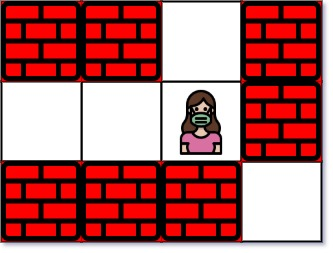

Example 1:
Input: maze = [["+","+",".","+"],[".",".",".","+"],["+","+","+","."]], entrance = [1,2]
Output: 1
Explanation: There are 3 exits in this maze at [1,0], [0,2], and [2,3].
Initially, you are at the entrance cell [1,2].
- You can reach [1,0] by moving 2 steps left.
- You can reach [0,2] by moving 1 step up.
It is impossible to reach [2,3] from the entrance.
Thus, the nearest exit is [0,2], which is 1 step away.

In [12]:
from collections import deque

class Solution:
    def nearestExit(self, maze, entrance):
        rows = len(maze)
        cols = len(maze[0])
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        
        queue = deque([(entrance[0], entrance[1], 0)])  # (x, y, distance)
        visited = set()
        visited.add((entrance[0], entrance[1]))
        
        while queue:
            x, y, distance = queue.popleft()
            
            if (x != entrance[0] or y != entrance[1]) and (x == 0 or x == rows - 1 or y == 0 or y == cols - 1):
                return distance
            
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                
                if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == '.' and (nx, ny) not in visited:
                    visited.add((nx, ny))
                    queue.append((nx, ny, distance + 1))
        
        return -1

In [9]:
class Solution:
    def nearestExit(self, maze, entrance) :
        self.maze = maze
        self.rows = len(maze)
        self.cols = len(maze[0])
        self.entrancex = entrance[0]
        self.entrancey = entrance[1]
        self.visited = [[False for _ in range(self.cols)] for _ in range(self.rows)]
        self.smallest = 100000
        self.number = 0
        result = []
        self.dfs(entrance[0], entrance[1], [[entrance[0], entrance[1]]], result)
        minimum = 10000
        print(result)
        for i in range(len(result)) :
            if minimum > len(result[i]) :
                minimum = len(result[i])
        if minimum == 10000 :
            return -1
        return minimum - 1

    def dfs(self, i, j, path, result):
        # 이상한 곳
        if (i < 0 or i > self.rows-1 or j < 0 or j > self.cols-1) :
            return
        if self.maze[i][j] == '+' or self.visited[i][j] == True :
            return
        # 현재 노드가 벽에 닿았으면 탈출 성공! # 문제는 현재 노드가 entrance node이면 안돼
        if (i == 0 or i == self.rows-1 or j == 0 or j == self.cols-1) and ((i == self.entrancex and j == self.entrancey) == True) :
            pass
        elif (i == 0 or i == self.rows-1 or j == 0 or j == self.cols-1) :
            result.append(path[:])              
            return
    
        self.visited[i][j] = True
        path.append([i+1, j])
        self.dfs(i+1, j, path, result)
        path.pop()
        path.append([i-1, j])
        self.dfs(i-1, j, path, result)
        path.pop()
        path.append([i, j+1])
        self.dfs(i, j+1, path, result)
        path.pop()
        path.append([i, j-1])
        self.dfs(i, j-1, path, result)
        path.pop()
    

In [13]:
maze = [["+",".","+","+","+","+","+"],["+",".","+",".",".",".","+"],["+",".","+",".","+",".","+"],["+",".",".",".",".",".","+"],["+","+","+","+",".","+","."]]
entrance = [0, 1]
S = Solution()
S.nearestExit(maze, entrance)

7

In [10]:
maze = [["+","+",".","+"],[".",".",".","+"],["+","+","+","."]]
entrance = [1,2]
S = Solution()
S.nearestExit(maze, entrance)


[[[1, 2], [0, 2]], [[1, 2], [1, 1], [1, 0]]]


1

In [11]:
maze = [["+","+","+"],[".",".","."],["+","+","+"]]
entrance = [1,0]
S = Solution()
S.nearestExit(maze, entrance)

[[[1, 0], [1, 1], [1, 2]]]


2

In [6]:
maze = [[".","+"]]
entrance = [0,0]
S = Solution()
S.nearestExit(maze, entrance)


-1